In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
benchmark_list = ['IF1_ECOLI', 'RS15_GEOSE', 'VRPI_BPT7', 'VG08_BPP22', 'PKN1_HUMAN', 'DN7A_SACS2', 'FKBP3_HUMAN', 'SBI_STAAM', 'SQSTM_MOUSE', 'HCP_LAMBD', 'ILF3_HUMAN', 'ARGR_ECOLI',
                                                    'SOX30_HUMAN', 'SUMO1_HUMAN', 'ENVZ_ECOLI', 'SCIN_STAAR', 'OTU7A_HUMAN', 'A0A247D711_LISMN', 'CCDB_ECOLI', 'TAT_HV1BR']

In [3]:
coverage_table = pd.DataFrame({"benchmark": [],
                               "model": [],
                               "coverage_rate": []})
                               

In [12]:
benchmark = benchmark_list[0]  # example benchmark

In [5]:
for benchmark in benchmark_list:
    path = f"/datasets/biochem/unaagi/ProteinGymSampling/run{benchmark}_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_size/Samples/aa_distribution.csv"
    aa_dist = pd.read_csv(path)
    not_covered = 0
    for index, row in aa_dist.iterrows():
            # print(row[row['aa']])
        v = row[row['aa']]
        if np.isnan(v) and v!='PRO':
            # print(index, row['aa'], v)
            
            not_covered += 1
    coverage_table = pd.concat([coverage_table, pd.DataFrame({"benchmark": [benchmark], "model": ["UNAAGI"], "coverage_rate": [1 - (not_covered / len(aa_dist))]})], ignore_index=True)
    # coverage_table = coverage_table.append({"benchmark": [benchmark], "model": ["UNAAGI"], "coverage_rate": [1 - (not_covered / len(aa_dist))]}, ignore_index=True)
    print(f"{benchmark}: {not_covered}/{len(aa_dist)} not covered, {not_covered/len(aa_dist)}")

IF1_ECOLI: 6/67 not covered, 0.08955223880597014
RS15_GEOSE: 3/60 not covered, 0.05
VRPI_BPT7: 6/55 not covered, 0.10909090909090909
VG08_BPP22: 2/37 not covered, 0.05405405405405406
PKN1_HUMAN: 5/67 not covered, 0.07462686567164178
DN7A_SACS2: 2/48 not covered, 0.041666666666666664
FKBP3_HUMAN: 3/67 not covered, 0.04477611940298507
SBI_STAAM: 3/56 not covered, 0.05357142857142857
SQSTM_MOUSE: 3/36 not covered, 0.08333333333333333
HCP_LAMBD: 2/52 not covered, 0.038461538461538464
ILF3_HUMAN: 2/64 not covered, 0.03125
ARGR_ECOLI: 7/65 not covered, 0.1076923076923077
SOX30_HUMAN: 4/56 not covered, 0.07142857142857142
SUMO1_HUMAN: 4/93 not covered, 0.043010752688172046
ENVZ_ECOLI: 7/58 not covered, 0.1206896551724138
SCIN_STAAR: 2/68 not covered, 0.029411764705882353
OTU7A_HUMAN: 2/39 not covered, 0.05128205128205128
A0A247D711_LISMN: 2/84 not covered, 0.023809523809523808
CCDB_ECOLI: 3/97 not covered, 0.030927835051546393
TAT_HV1BR: 9/81 not covered, 0.1111111111111111


In [6]:
path_cp2 = "/datasets/biochem/unaagi/ProteinGymSampling/runCP2_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_absorb_state_0917_variational_sampling/Samples/aa_distribution.csv"
aa_dist = pd.read_csv(path_cp2)
not_covered = 0
for index, row in aa_dist.iterrows():
        # print(row[row['aa']])
    v = row[row['aa']]
    if np.isnan(v) and v!='PRO':
        # print(index, row['aa'], v)
        
        not_covered += 1
print(1-(not_covered / len(aa_dist)))

0.9090909090909091


In [7]:
path_puma = "/datasets/biochem/unaagi/ProteinGymSampling/runPUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling/Samples/aa_distribution.csv"
aa_dist = pd.read_csv(path_puma)
not_covered = 0
for index, row in aa_dist.iterrows():
        # print(row[row['aa']])
    v = row[row['aa']]
    if np.isnan(v) and v!='PRO':
        # print(index, row['aa'], v)
        
        not_covered += 1
print(1 - (not_covered / len(aa_dist)))

0.9615384615384616


In [22]:
len(aa_dist)

81

In [24]:
1 - (not_covered / len(aa_dist))

0.9090909090909091

In [8]:
coverage_table = pd.concat([coverage_table, pd.DataFrame({"benchmark": ["CP2", "PUMA"], "model": ["UNAAGI", "UNAAGI"], "coverage_rate": [0.9090909090909091, 0.9615384615384616]})], ignore_index=True)

In [9]:
coverage_table.coverage_rate.mean()

0.9369318075387894

In [10]:
pepinvent_baseline = pd.read_csv("/home/qcx679/hantang/PepINVENT/pepinvent_coverage_table.csv")

In [11]:
pepinvent_baseline.coverage_rate.mean()

0.23649185106145246

In [12]:
pepinvent_baseline = pepinvent_baseline[["benchmark_name", "coverage_rate"]]
pepinvent_baseline['model'] = 'PepINVENT'
pepinvent_baseline = pepinvent_baseline.rename(columns={"benchmark_name": "benchmark"})
large_table = pd.concat([coverage_table, pepinvent_baseline], ignore_index=True)


In [15]:
piv

model,PepINVENT,UNAAGI
benchmark,,
A0A247D711_LISMN,0.413793,0.976190
ARGR_ECOLI,0.173913,0.892308
CCDB_ECOLI,0.360000,0.969072
CP2,0.250000,0.909091
DN7A_SACS2,0.363636,0.958333
ENVZ_ECOLI,0.283333,0.879310
FKBP3_HUMAN,0.202899,0.955224
HCP_LAMBD,0.181818,0.961538
IF1_ECOLI,0.222222,0.910448


In [21]:
models_to_plot = [
    "ProteinMPNN",
    "ESM2_3B",
    "ESM1v_ensemble",
    "Progen2_large",
    "ESM-IF1",
    "UNAAGI",
    "PepINVENT"
]
colors = {
    "PepINVENT": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI": "#ff1493",                  # bright red (highlight)
    "ESM1v_ensemble": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",                   # gray
}


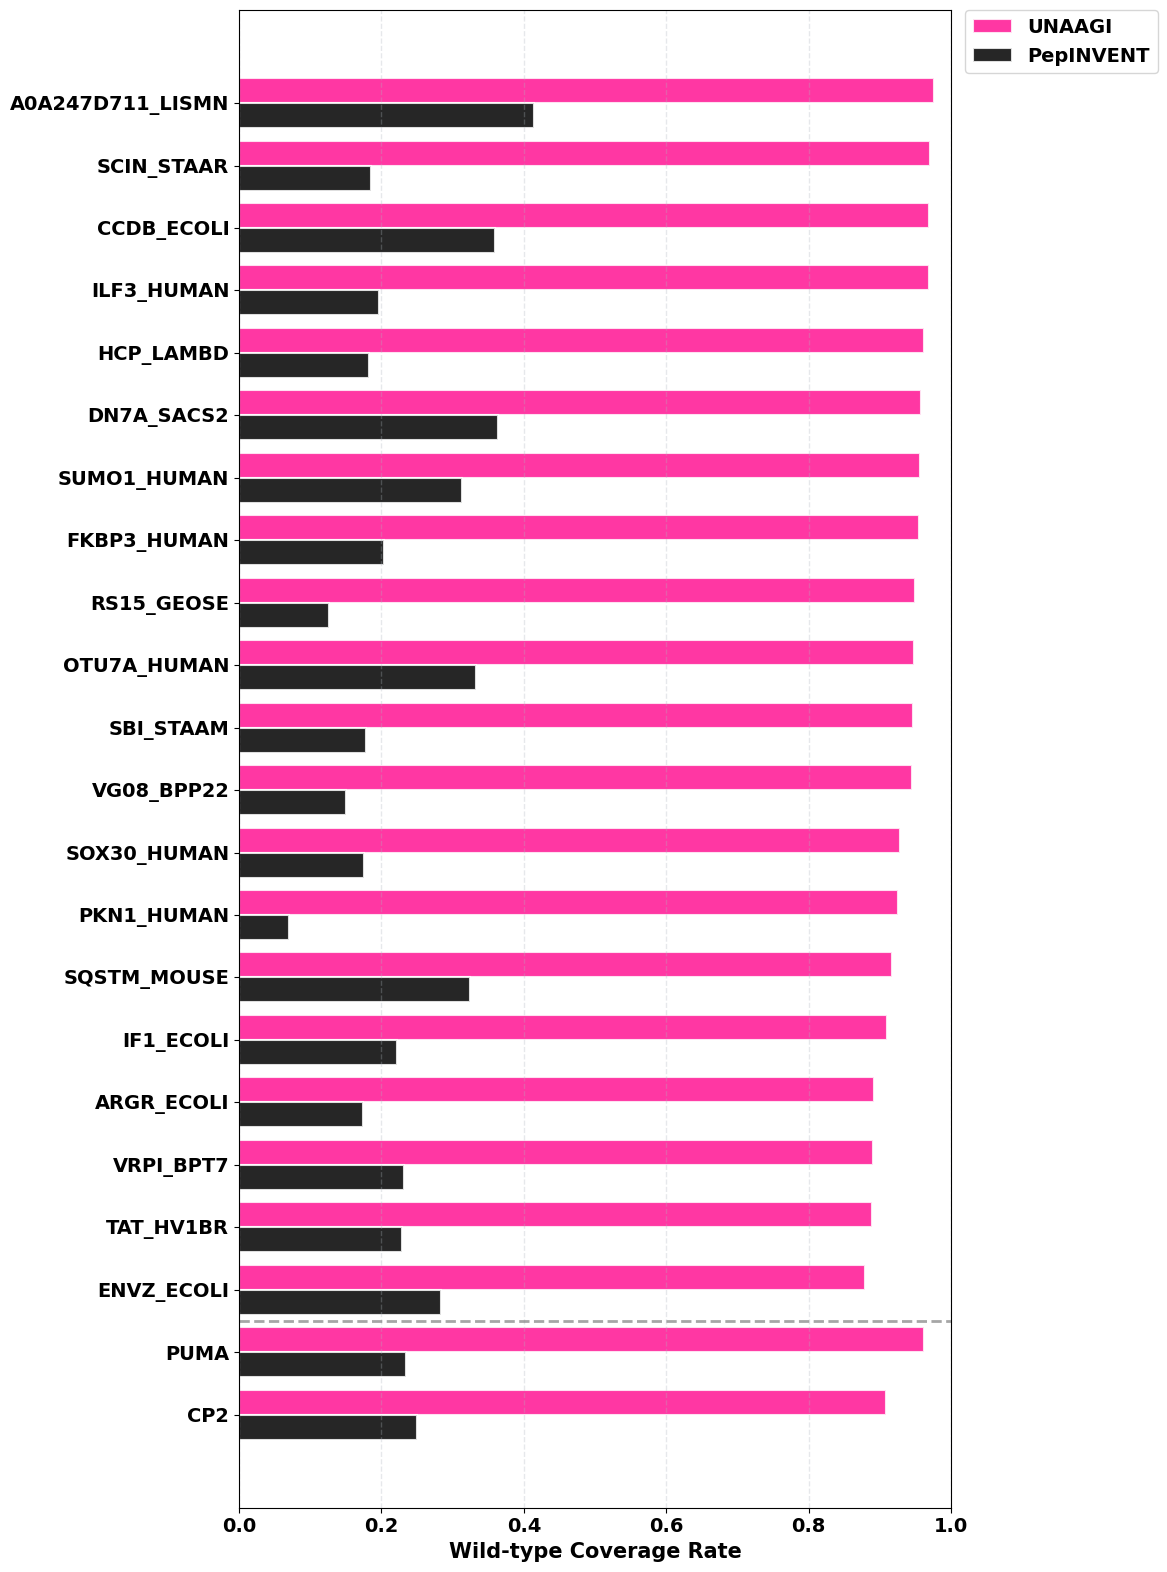

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- pivot + sort ---
piv = large_table.pivot_table(
    index="benchmark", columns="model", values="coverage_rate"
)
models_to_plot = [m for m in models_to_plot if m in piv.columns]

# Benchmarks to highlight separately
special_benchmarks = ["PUMA", "CP2"]

# Split: others sorted by UNAAGI, specials go to the right
ref_model = "UNAAGI"
others = piv.drop(index=special_benchmarks, errors="ignore")
specials = piv.loc[special_benchmarks]

piv_sorted = pd.concat([
    others.sort_values(by=ref_model, ascending=False),
    specials
])

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- style ---
plt.rcParams.update({
    "font.size": 16,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 15,
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})

fig, ax = plt.subplots(figsize=(12, 16))

# Calculate bar positions
n_models = len(models_to_plot)
bar_height = 0.8 / n_models  # Total height per benchmark group

# --- plotting loop for grouped bars ---
for i, m in enumerate(models_to_plot):
    y_values = piv_sorted[m].values
    # Offset each model's bars within the group
    y_positions = x + (i - n_models/2 + 0.5) * bar_height
    
    ax.barh(
        y_positions, y_values,
        height=bar_height,
        label=m,
        alpha=0.85,
        edgecolor='white',
        linewidth=1.5,
        color=colors.get(m, None)
    )

# --- cosmetics ---
ax.set_yticks(x)
ax.set_yticklabels(benchmarks)
ax.set_xlabel(r"Wild-type Coverage Rate", fontweight='bold', fontsize=15)
ax.set_xlim(0.0, 1.0)
ax.grid(axis="x", linestyle="--", alpha=0.3, color='#adb5bd', linewidth=1)

# Add horizontal dashed line before the special benchmarks
split_index = len(piv_sorted) - len(special_benchmarks)
ax.axhline(y=split_index - 0.5, color="gray", linestyle="--", linewidth=2, alpha=0.7)

# Invert y-axis so first benchmark is at top
ax.invert_yaxis()

ax.legend(
    title="", 
    frameon=True, 
    loc="lower right",
    fancybox=True,
    shadow=True,
    framealpha=0.95
)
plt.tight_layout()
plt.savefig("coverage_rate_split.svg", format="svg", dpi=300, bbox_inches='tight')
plt.show()
